In [0]:
import numpy as np 
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded  = files.upload()
import io
laliga = pd.read_csv(io.BytesIO(uploaded['Laliga.csv']))

Saving Laliga.csv to Laliga.csv


In [0]:
laliga.shape

(61, 20)

# top sports company. 

In [0]:
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


###Which are the teams which started playing between 1930-1980?


In [0]:
teams_list = laliga[(laliga['Debut']>str(1930)) & (laliga['Debut']<str(1980))]['Team']


###Which are the top 5 teams in terms of points?


In [0]:
laliga.sort_values(by='Points',ascending =False).head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
20,21,Villarreal,17,970,646,266,172,208,892,789,-,1,1,2,3,2,9,1998-99,2013-14,2
45,46,Real Burgos,3,96,114,26,44,44,101,139,-,-,-,-,-,-,-,1990-91,1992-93,9
46,47,Gimnastic,4,91,116,34,16,66,181,295,-,-,-,-,-,-,-,1947-48,2006-07,7
47,48,Extremadura,2,83,80,20,23,37,62,117,-,-,-,-,-,-,-,1996-97,1998-99,17
48,49,Merida,2,81,80,19,24,37,70,115,-,-,-,-,-,-,-,1995-96,1997-98,19


###What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)


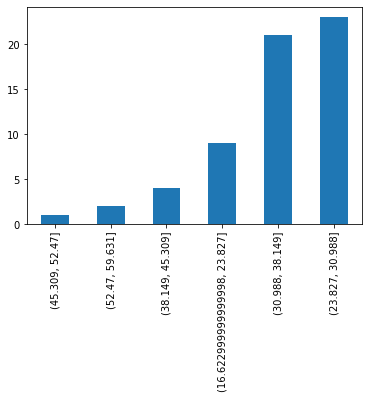

In [0]:
laliga['GamesWon'] = pd.to_numeric(laliga['GamesWon'],errors ='coerce')
laliga['GamesPlayed'] = pd.to_numeric(laliga['GamesPlayed'],errors='coerce')


laliga['Win_perc']  = (laliga['GamesWon']/laliga['GamesPlayed'])*100

#sns.distplot(laliga['Win_perc'].dropna())
#skewness of the winning percentage 
laliga['Win_perc'].skew()
laliga['Win_perc'].value_counts(bins=6,ascending=True).plot.bar()

As we can see from the distribution plot that tail on the positive side is spreaded and thus the distribution is highly skewed on the right side .

Also only three  teams have winning percentage more the 52  perc.
Majority of the teams has their winning team percentage ranging between 23 to 38.




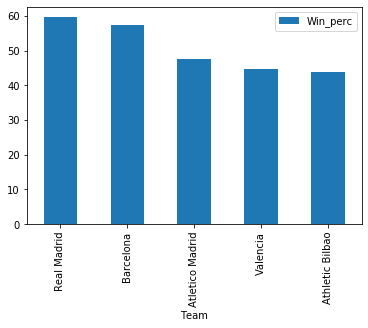

In [0]:
laliga[['Win_perc','Team']].set_index('Team').sort_values(by='Win_perc',ascending=False).head(5).plot.bar()

 Above are the five teams those are having winning percentage in top 5 .



###Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.


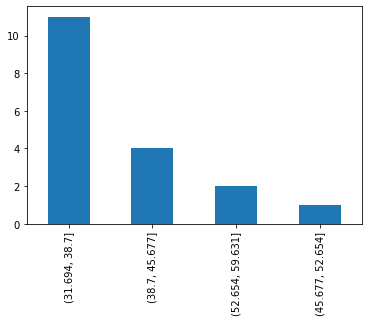

In [0]:
team_1 = laliga[laliga['BestPosition'].between(1,3)]['Win_perc']
team_4 = laliga[laliga['BestPosition'].between(4,7)]['Win_perc']

team_1.value_counts(bins=4).plot.bar()

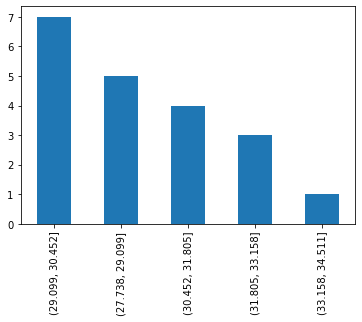

In [0]:
team_4.value_counts(bins=5).plot.bar()

As we can infer that majority of the teams which have 4-7 as bestposition have maximum 35% as their winning percentage.
Also,majority of the teams which have 1-3 as bestposition have minimum 33 % as their winning percentage.

#measure the blood pressure 

###Calculate the estimated standard error of the sample mean? What does the standard error indicate?


In [0]:
n = 200               #  random samples of 200
mu = 140              # mean of the systolic blood pressure in the sample was 140 mm Hg 
sigma = 25            # the standard deviation was 25 mm Hg 

#esitmated standard error

st_error = sigma/np.sqrt(n)
st_error

1.7677669529663687

Standard error of the sample mean gives the measure of dispersion of the sample means around the population mean .
Thus this indicates sample mean is 1.67 units far from the population mean 

###Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [0]:
#given :
#alpha = 0.05
# we know that CI(confidence interval) =  Point Estimate+ Margin of error
#Here we will take point estimate as mean .
#marginOfError = z(alpha/2)*st_error
z_alphaby2 = st.norm.isf(0.05)
#thus
marginOfError = z_alphaby2*st_error
#now
CI = mu + marginOfError
CI_1 = mu - marginOfError

print(f"upper: {CI} limit and lower limit: {CI_1} for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma")

upper: 142.9077178841917 limit and lower limit: 137.0922821158083 for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma


###Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [0]:
#given :
#n =100
#thus
st_error_new = sigma/np.sqrt(100)
#alpha = 0.05
# we know that CI(confidence interval) =  Point Estimate+ Margin of error
#Here we will take point estimate as mean .
#marginOfError = z(alpha/2)*st_error
z_alphaby2 = st.norm.isf(0.05)
#thus
marginOfError = z_alphaby2*st_error_new
#now
CI = mu + marginOfError
CI_1 = mu - marginOfError

print(f"upper: {CI} limit and lower limit: {CI_1} for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma")

upper: 144.1121340673787 limit and lower limit: 135.8878659326213 for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma


###Which of the two above intervals are wider?


In [0]:
# Confidence interval with 200 samples (142.9,137.09)
diff_1 = 142.9-137.09
# Confidence interval with 100 samples (144.11,135.88)
diff_2 = 144.11-135.88
diff_1,diff_2

(5.810000000000002, 8.230000000000018)

Clearly , wider interval is for less (100) number of samples.

###Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

Estimated standard error gives us the standard variance of the sample mean from the population mean . Thus we can find out how much our mean of the sample is deviated from parameteric or true mean . 
Distribution will be more around true mean when standard error is less which can only happen when dispersion is less .For that sample size should be as close to popluation size.

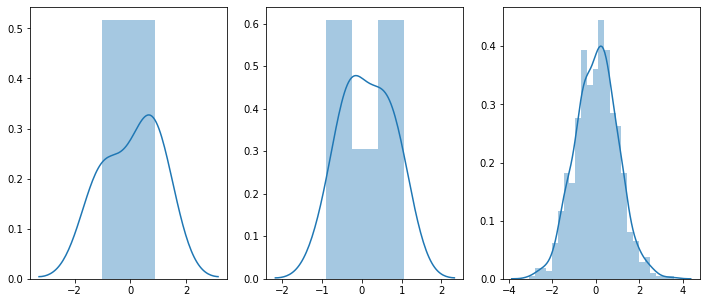

In [0]:
#Lets take 
import random
fig, ax = plt.subplots(1,3,figsize=(12,5))
population_data = list(np.random.randn(1000))
sample_data_1 = random.sample(population_data,5)
sample_data_2 = random.sample(population_data,10)
sample_data_3 = random.sample(population_data,800)
sns.distplot(sample_data_1,ax=ax[0])
sns.distplot(sample_data_2,ax=ax[1])
sns.distplot(sample_data_3,ax=ax[2])

 from above we can see with increase in sample size there is decrease in dispersion i.e. standard error

#golf equipment. Management 

###Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls

In [6]:
from google.colab import files
uploaded = files.upload()
import io
golf = pd.read_csv(io.BytesIO(uploaded['Golf.csv']))
golf.head()

Saving Golf.csv to Golf.csv


,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


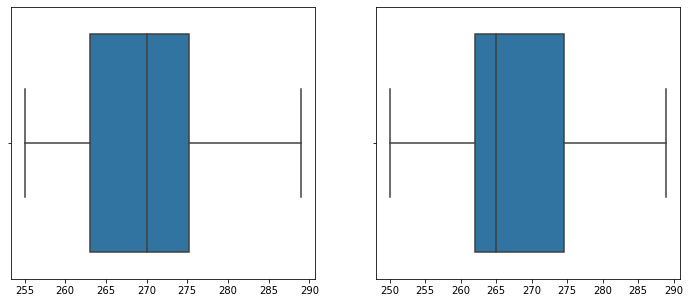

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
golf_current = golf['Current'].to_numpy()
golf_new = golf['New'].to_numpy()

sns.boxplot(golf_current,ax=ax[0])
sns.boxplot(golf_new,ax=ax[1])

We have here driving distances of both types of golf ball .
Assuming $\mu_c$  be the mean for driving distance of current golf balls and $\mu_n$ be the mean for new golf balls.

Here we have been given both of them . Thus considering both data as independent variable.

Now the sample size is 40 while standard deviation is unknown. Thus ,for two samples we can use Unpaired T Test.

$H_0$ : Assuming there is no significant difference i.e. $\mu_c$ = $\mu_n$ or $\mu_n$-$\mu_c$ =0

$H_a$ : Assuming there is  significant difference i.e. $\mu_c$ = $\mu_n$ or $\mu_n$-$\mu_c$ $\ne$ 0


In [8]:
golf_current.shape

(40,)

In [9]:
golf_new.shape

(40,)

In [10]:
st.ttest_ind(golf_current,golf_new)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

###Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?


In [11]:
print(golf_current.mean(),golf_new.mean())
#pvalue=0.188

270.275 267.5


Also from the T test we can see P-value is far greater than alpha(0.05) thus we donot have enough evidence to reject $H_0$ .
We are failed to reject $H_0$.
Hence,Par inc should give increase the number of samples for better results.
We can have different random samples.

###What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [14]:
#given :
#n =100
#thus
sigma =golf_current.std()
mu = golf_current.mean()
golf_current_size = golf_current.shape[0]
st_error_new = sigma/np.sqrt(golf_current_size)
#alpha = 0.05
# we know that CI(confidence interval) =  Point Estimate+ Margin of error
#Here we will take point estimate as mean .
#marginOfError = z(alpha/2)*st_error
z_alphaby2 = st.norm.isf(0.05)
#thus
marginOfError = z_alphaby2*st_error_new
#now
CI = mu + marginOfError
CI_1 = mu - marginOfError

print(f"upper: {CI} limit and lower limit: {CI_1} for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma")

upper: 272.52279005389886 limit and lower limit: 268.0272099461011 for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma


In [15]:
#given :
#n =100
#thus
sigma =golf_new.std()
mu = golf_new.mean()
golf_new_size = golf_new.shape[0]
st_error_new = sigma/np.sqrt(golf_new_size)
#alpha = 0.05
# we know that CI(confidence interval) =  Point Estimate+ Margin of error
#Here we will take point estimate as mean .
#marginOfError = z(alpha/2)*st_error
z_alphaby2 = st.norm.isf(0.05)
#thus
marginOfError = z_alphaby2*st_error_new
#now
CI = mu + marginOfError
CI_1 = mu - marginOfError

print(f"upper: {CI} limit and lower limit: {CI_1} for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma")

upper: 270.04155169073005 limit and lower limit: 264.95844830926995 for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma


In [16]:
#given :
#n =100
#thus
golf_diff = abs(golf_new-golf_current)
sigma =golf_diff.std()
mu = golf_diff.mean()
golf_diff_size = golf_new.shape[0]
st_error_new = sigma/np.sqrt(golf_diff_size)
#alpha = 0.05
# we know that CI(confidence interval) =  Point Estimate+ Margin of error
#Here we will take point estimate as mean .
#marginOfError = z(alpha/2)*st_error
z_alphaby2 = st.norm.isf(0.05)
#thus
marginOfError = z_alphaby2*st_error_new
#now
CI = mu + marginOfError
CI_1 = mu - marginOfError

print(f"upper: {CI} limit and lower limit: {CI_1} for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma")

upper: 13.072714824766468 limit and lower limit: 8.57728517523353 for 95% confidence interval of true mean blood pressure for all 60 year old women with glaucoma
